In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# homedir = "/home/annzhou"
homedir = "/u/az6922"
dirprefix = f"{homedir}/DRing/src/emp/datacentre"
fseedarr = range(1,6)
itemnamearr = ["dring","leafspine"]
# percentilearr = list(range(10,91,10))+[99]
percentilearr = list(range(10,91,10))
pickledatadict = dict()
pickledatadict["prv1,leafspine,2"] = "prv1_data.pickle" 
pickledatadict["prv1,leafspine,10"] = "prv1_data.pickle" 
pickledatadict["prv1,dring,2"] = "prv1_data2.pickle" 
pickledatadict["prv1,dring,10"] = "prv1_data2.pickle" 
pickledatadict["cluster_a,leafspine,10"] = "cluster_a_data.pickle" 
pickledatadict["cluster_a,leafspine,60"] = "cluster_a_data2.pickle" 
pickledatadict["cluster_a,dring,10"] = "cluster_a_data.pickle" 
pickledatadict["cluster_a,dring,60"] = "cluster_a_data2.pickle"

/tmp/ipykernel_2069406/903188557.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
/tmp/ipykernel_2069406/903188557.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)


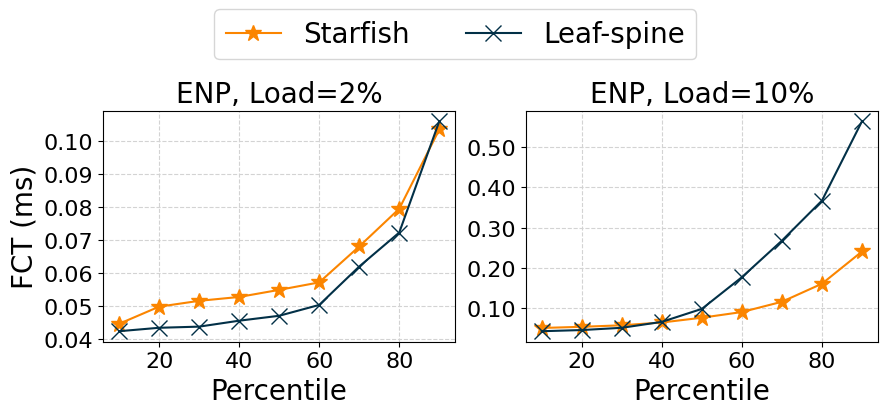

In [5]:
# run on ocean
import pickle

trafficname = "prv1"
loadarr = [2,10]
title = "ENP"

markerlist=['*','x']
labellist=["Starfish","Leaf-spine"]
colorlist = ["#fb8500","#023047"]

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig,axs = plt.subplots(1,2,figsize=(5*2,3*1))

for iload,load in enumerate(loadarr):
    for iitemname,itemname in enumerate(itemnamearr):

        picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
        with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
            datadict = pickle.load(handle)

        fctlist = [list() for _ in range(len(percentilearr))]
        for fseed in fseedarr:
            logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
            durationlist = datadict[logfile][0]
            durationlist.sort()
            durationlistlen = len(durationlist)

            for ipercentile,percentile in enumerate(percentilearr):
                fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

        axs[iload].plot(percentilearr,[sum(mylist)/len(mylist) for mylist in fctlist],label=labellist[iitemname],marker=markerlist[iitemname],markersize=12,color=colorlist[iitemname])
        if iload==0:
            axs[iload].set_ylabel('FCT (ms)', fontsize=20)
        axs[iload].set_xlabel('Percentile', fontsize=20)
        axs[iload].set_title(f"{title}, Load={load}%", fontsize=20)
        # axs[iload].set_ylim(0,ylimlist[itrafficname])
        # axs[iload].set_xlim(0,xlimlist[itrafficname])
        axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
        axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)
        axs[iload].grid(color='lightgrey', linestyle='dashed', axis="both")

handles, labels = axs[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(-0.2, 1.5), fontsize=20)
# plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_percentile_{trafficname}.pdf", dpi=600, bbox_inches='tight')
plt.show()

/tmp/ipykernel_2407437/520892517.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
/tmp/ipykernel_2407437/520892517.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)


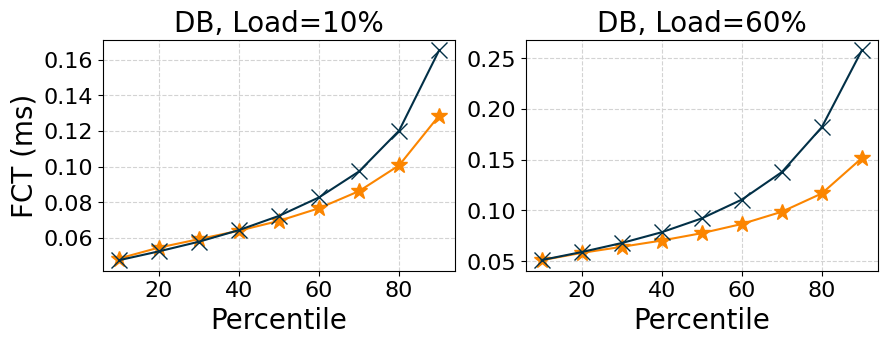

In [3]:
# run on meaty01
import pickle

trafficname = "cluster_a"
loadarr = [10,60]
title = "DB"

markerlist=['*','x']
labellist=["Starfish","Leaf-spine"]
colorlist = ["#fb8500","#023047"]

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig,axs = plt.subplots(1,2,figsize=(5*2,3*1))

for iload,load in enumerate(loadarr):
    for iitemname,itemname in enumerate(itemnamearr):

        picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
        with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
            datadict = pickle.load(handle)

        fctlist = [list() for _ in range(len(percentilearr))]
        for fseed in fseedarr:
            logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
            durationlist = datadict[logfile][0]
            durationlist.sort()
            durationlistlen = len(durationlist)

            for ipercentile,percentile in enumerate(percentilearr):
                fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

        axs[iload].plot(percentilearr,[sum(mylist)/len(mylist) for mylist in fctlist],label=labellist[iitemname],marker=markerlist[iitemname],markersize=12,color=colorlist[iitemname])
        if iload==0:
            axs[iload].set_ylabel('FCT (ms)', fontsize=20)
        axs[iload].set_xlabel('Percentile', fontsize=20)
        axs[iload].set_title(f"{title}, Load={load}%", fontsize=20)
        # axs[iload].set_ylim(0,ylimlist[itrafficname])
        # axs[iload].set_xlim(0,xlimlist[itrafficname])
        axs[iload].set_xticklabels([int(x) for x in axs[iload].get_xticks()], fontsize=16)
        axs[iload].set_yticklabels([f"{x:.2f}" for x in axs[iload].get_yticks()], fontsize=16)
        axs[iload].grid(color='lightgrey', linestyle='dashed', axis="both")

# handles, labels = axs[0].get_legend_handles_labels()
# plt.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(-0.2, 1.5), fontsize=20)
# plt.tight_layout()
plt.savefig(f"{homedir}/DRing/src/emp/datacentre/nsdi25_plotting/fig_percentile_{trafficname}.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# # analysis, should comment out by default
# # run on ocean
# import pickle

# trafficname = "prv1"
# loadarr = [2,10]

# for iload,load in enumerate(loadarr):
#     for iitemname,itemname in enumerate(itemnamearr):

#         picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
#         with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
#             datadict = pickle.load(handle)

#         fctlist = [list() for _ in range(len(percentilearr))]
#         for fseed in fseedarr:
#             logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
#             durationlist = datadict[logfile][0]
#             durationlist.sort()
#             durationlistlen = len(durationlist)

#             for ipercentile,percentile in enumerate(percentilearr):
#                 fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

#         myfctlist = [sum(mylist)/len(mylist) for mylist in fctlist]
#         print(f"{load},{itemname},{myfctlist}")
        

2,leafspine,[0.0423592, 0.043402380000000004, 0.0437488, 0.0455487, 0.047039279999999996, 0.05032554, 0.06196448, 0.07227155999999998, 0.1059966]
2,dring,[0.0445942, 0.04979904, 0.051566900000000006, 0.05274206, 0.0548896, 0.05715437999999999, 0.06804580000000002, 0.07947958000000001, 0.10349459999999999]
10,leafspine,[0.0434767, 0.04638056, 0.051968059999999996, 0.06665794, 0.09884442, 0.1773266, 0.2678746, 0.36701059999999996, 0.5635083999999999]
10,dring,[0.0515371, 0.054391520000000006, 0.05819478, 0.06508088000000001, 0.07692837999999999, 0.09102194, 0.1164428, 0.1611434, 0.24091140000000003]


In [ ]:
# # analysis, should comment out by default
# # run on meaty01
# import pickle

# trafficname = "cluster_a"
# loadarr = [10,60]

# for iload,load in enumerate(loadarr):
#     for iitemname,itemname in enumerate(itemnamearr):

#         picklename = pickledatadict[f"{trafficname},{itemname},{load}"]
#         with open(f'{homedir}/DRing/src/emp/datacentre/experiments/routing/{picklename}', 'rb') as handle:
#             datadict = pickle.load(handle)

#         fctlist = [list() for _ in range(len(percentilearr))]
#         for fseed in fseedarr:
#             logfile = f"m_{itemname}_{trafficname}_{load}_{fseed}.log"
#             durationlist = datadict[logfile][0]
#             durationlist.sort()
#             durationlistlen = len(durationlist)

#             for ipercentile,percentile in enumerate(percentilearr):
#                 fctlist[ipercentile].append(durationlist[int(durationlistlen*(percentile/100.0))])

#         myfctlist = [sum(mylist)/len(mylist) for mylist in fctlist]
#         print(f"{load},{itemname},{myfctlist}")
        

10,leafspine,[0.047397640000000005, 0.05238005999999999, 0.057799460000000004, 0.06431329999999999, 0.07228992, 0.08267778, 0.09725854, 0.12016260000000001, 0.1652746]
10,dring,[0.0483571, 0.0544875, 0.05923286, 0.0639821, 0.06948688, 0.07659198, 0.08620074, 0.10066699999999999, 0.12859199999999998]
60,leafspine,[0.05111902, 0.05900826, 0.06787102, 0.07852859999999999, 0.09214416, 0.110605, 0.137677, 0.1819696, 0.25761780000000006]
60,dring,[0.05097142, 0.058193419999999996, 0.06415654, 0.0703578, 0.07759186, 0.08662152, 0.09866752, 0.11670739999999999, 0.1515104]


In [ ]:
# # lslist = [0.0423592, 0.043402380000000004, 0.0437488, 0.0455487, 0.047039279999999996, 0.05032554, 0.06196448, 0.07227155999999998, 0.1059966]
# # dringlist = [0.0445942, 0.04979904, 0.051566900000000006, 0.05274206, 0.0548896, 0.05715437999999999, 0.06804580000000002, 0.07947958000000001, 0.10349459999999999]
# # lslist = [0.0434767, 0.04638056, 0.051968059999999996, 0.06665794, 0.09884442, 0.1773266, 0.2678746, 0.36701059999999996, 0.5635083999999999]
# # dringlist = [0.0515371, 0.054391520000000006, 0.05819478, 0.06508088000000001, 0.07692837999999999, 0.09102194, 0.1164428, 0.1611434, 0.24091140000000003]
# # lslist = [0.047397640000000005, 0.05238005999999999, 0.057799460000000004, 0.06431329999999999, 0.07228992, 0.08267778, 0.09725854, 0.12016260000000001, 0.1652746]
# # dringlist = [0.0483571, 0.0544875, 0.05923286, 0.0639821, 0.06948688, 0.07659198, 0.08620074, 0.10066699999999999, 0.12859199999999998]
# lslist = [0.05111902, 0.05900826, 0.06787102, 0.07852859999999999, 0.09214416, 0.110605, 0.137677, 0.1819696, 0.25761780000000006]
# dringlist = [0.05097142, 0.058193419999999996, 0.06415654, 0.0703578, 0.07759186, 0.08662152, 0.09866752, 0.11670739999999999, 0.1515104]
# difflist = list()
# adifflist = list()
# for i in range(len(lslist)):
#     ls = lslist[i]
#     dring = dringlist[i]
#     difflist.append((dring-ls)/ls)
#     adifflist.append(dring-ls)

# mymin = min(difflist)
# mymax = max(difflist)
# for ix,x in enumerate(difflist):
#     if x==mymin:
#         myminindex = ix 
#     if x==mymax:
#         mymaxindex = ix 
# print(f"{mymin},{myminindex}")
# print(f"{mymax},{mymaxindex}")
# print(sum(difflist)/len(difflist))

# mymin = min(adifflist)
# mymax = max(adifflist)
# for ix,x in enumerate(adifflist):
#     if x==mymin:
#         myminindex = ix 
#     if x==mymax:
#         mymaxindex = ix 
# print(f"{mymin},{myminindex}")
# print(f"{mymax},{mymaxindex}")
# print(sum(adifflist)/len(adifflist))


-0.41187914810234405,8
-0.002887379296394918,0
-0.17823393239394558
-0.10610740000000007,8
-0.00014759999999999773,0
-0.02908473111111112
